## 线性回归

### 数据生成

In [1]:
#! 调库
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def true_fun(X):
    return 1.5*X + 0.2

In [3]:
#? 随机生成训练集x和y
np.random.seed(0) #? 随机种子
n_samples = 30 #? 采样数据个数
X_train= np.sort(np.random.rand(n_samples))
Y_train=(true_fun(X_train) + np.random.randn(n_samples)*0.05).reshape(n_samples,1) #? randn函数返回一个或一组样本，具有标准正态分布

### 定义模型

In [5]:
from sklearn.linear_model import LinearRegression #?导入线性回归模型
model = LinearRegression() #? 定义模型
model.fit(X_train[:,np.newaxis], Y_train) #? 把X_train的shape从(30,)改成(30,1)
print('w:',model.coef_) #?输出w
print('b',model.intercept_) #?输出b

w: [[1.4474774]]
b [0.22557542]


### 绘图

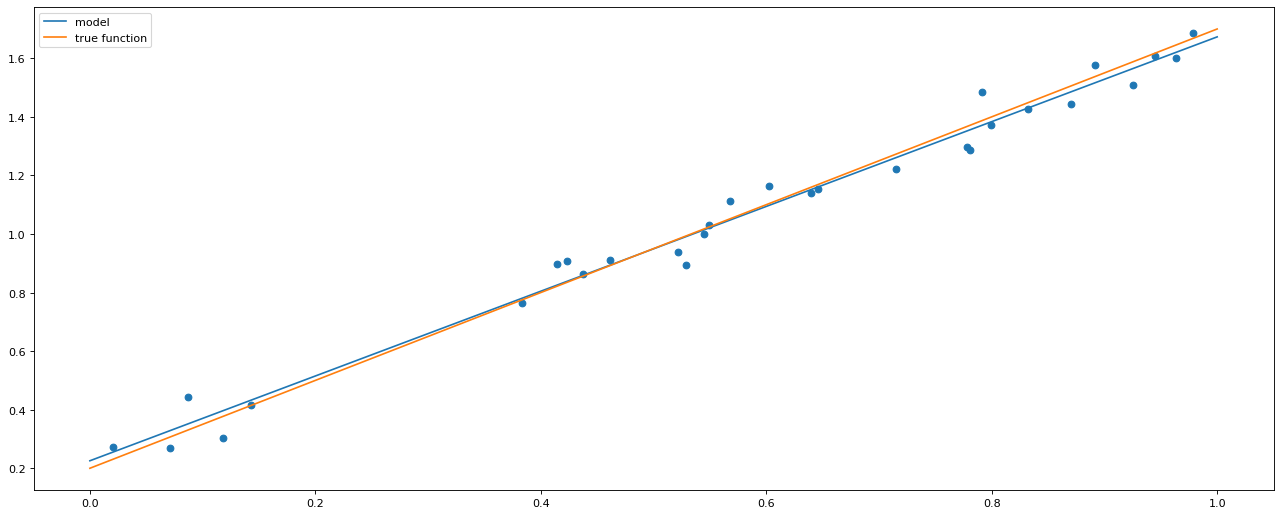

In [7]:
x_test = np.linspace(0,1,100)
plt.figure(figsize=(20,8),dpi=80) #? 设置图片大小
plt.plot(x_test, model.predict(x_test[:,np.newaxis]), label='model')
plt.plot(x_test,true_fun(x_test),label='true function')
plt.scatter(X_train,Y_train) #? 绘制散点图
plt.legend(loc="best") #? 图例
plt.show()

## 多项式回归

In [8]:
#! 调库
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #? 导入能够计算多项式特征的类
from sklearn.model_selection import cross_val_score #? 交叉验证需要的模块

Pipeline可以将许多算法模型串联起来，比如将特征提取、归一化、分类组织在一起形成一个典型的机器学习问题工作流。主要带来两点好处：
1. 直接调用fit和predict方法来对pipeline中的所有算法模型进行训练和预测。
2. 可以结合grid search对参数进行选择。

### 生成数据

In [9]:
def true_function (x):
    return np.cos(1.5 * np.pi * x)

In [10]:
x = np.sort(np.random.rand(n_samples))
y = true_function(x) + np.random.randn(n_samples)*0.1

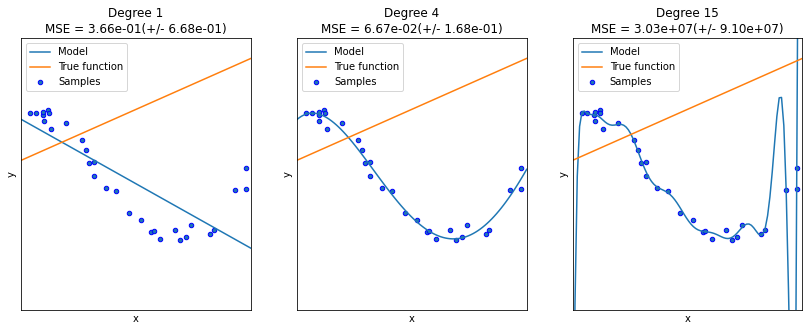

In [18]:
degrees = [1,4,15]
plt.figure(figsize=(14,5)) #? 长14，宽5
for i in range(len(degrees)):
    ax =plt.subplot(1,len(degrees), i+1) #? 表示把显示界面分割成1*3的网格。其中，第一个参数是行数，第二个参数是列数，第三个参数表示图形的标号
    plt.setp(ax,xticks=(),yticks=())
    polynomial_features=PolynomialFeatures(degree=degrees[i],include_bias=False) #? degree表示多项式的变化维度，比如当为4时则为^4；include_bias表示是否添加一列全部为1的偏置项
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])  #? 串联模型
    pipeline.fit(x[:,np.newaxis],y)
    scores = cross_val_score(pipeline, x[:, np.newaxis], y,scoring="neg_mean_squared_error", cv=10)
    #? scoring:验证方式;cv:交叉验证折数或可迭代的次数
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]), label="Model")
    plt.plot(x_test, true_fun(x_test), label="True function")
    plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
plt.show()